<a href="https://colab.research.google.com/github/Raahee1729/PyCBC-Tuts-and-Examples/blob/main/Noise_in_freq_domain_(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install PyCBC and downgrade NumPy
!pip install -q numpy==1.23.5
!pip install -q pycbc

# Restart the runtime to finalize NumPy change
import os
os.kill(os.getpid(), 9)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
bigframes 2.8.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=

here it the code to generate he PSD.

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


tsamples= 524288
fsamples= 262145
df= 0.0078125
PSD= [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.17994553e-47
 8.18000032e-47 0.00000000e+00]


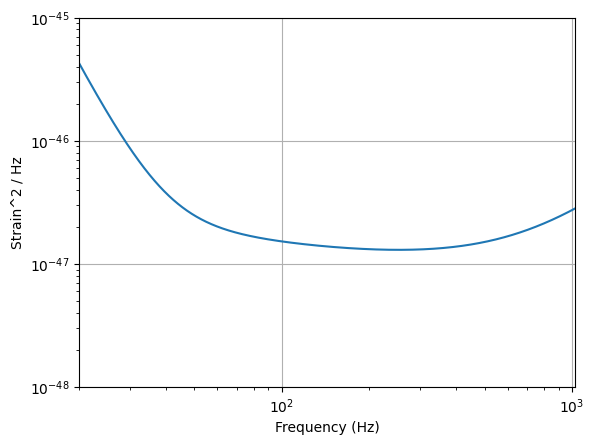

In [1]:
%matplotlib inline
import pycbc.noise
import pycbc.psd
import pylab


f_lower = 10                            # sets the lower frequncy cutoff
duration = 128                          # Determines the frequency resolution df = 1 / duration
sample_rate = 4096                      # how many samples per second are used in Hz
tsamples = sample_rate * duration       # 1sec = 4096 samples then how many samples for the duration of 128 sec
print('tsamples=',tsamples)
fsamples = tsamples // 2 + 1            # I dont get it.
print('fsamples=',fsamples)
df = 1.0 / duration
print('df=', df)
psd = pycbc.psd.from_string('aLIGOZeroDetHighPower', fsamples, df, f_lower) #modul format for form a string of psd's
print('PSD=',psd)

pylab.loglog(psd.sample_frequencies, psd)  # Shows how noise power varies with frequency
                                           #pycbc.psd.from_string(model, length, delta_f, low_freq_cutoff)
pylab.xlim(20, 1024)
pylab.ylim(1e-48, 1e-45)
pylab.xlabel('Frequency (Hz)')
pylab.ylabel('Strain^2 / Hz')
pylab.grid()


In [24]:
htilde = pycbc.noise.frequency_noise_from_psd(psd, seed=857) # This returns noise in frequancy domain that matches the given frequancy
                                                             # seed is number used for random number generation,its for the starting point
                                                             # this is random noise but the power of noise is shaped by the psd generates previously

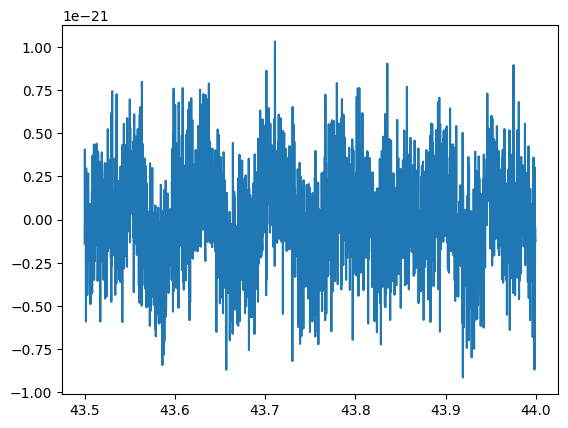

In [25]:
hoft = htilde.to_timeseries()                                # Converts frequency-domain noise (htilde) to time-domain noise (hoft)
                                                             # so basically doing inverse FFT
# Well zoom in around a short time
hoft_zoom = hoft.time_slice(43.5, 44)
pylab.plot(hoft_zoom.sample_times, hoft_zoom)

(1e-48, 1e-45)

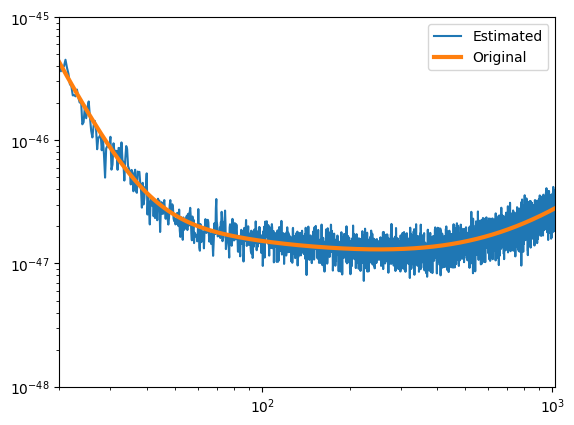

In [20]:
# Use Welch's method with 4s segments
psd_estimated = hoft.psd(4)                                     # divides the segmant in 4 part, takes FFT

pylab.loglog(psd_estimated.sample_frequencies, psd_estimated, label='Estimated')
pylab.loglog(psd.sample_frequencies, psd, label='Original', linewidth=3)
pylab.legend()
pylab.xlim(20, 1024)
pylab.ylim(1e-48, 1e-45)